In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [12]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [13]:
delivery

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [14]:
# Joining Match.csv and Delivery.csv to find purple cap holder of seasons

new_match = match[['id','season']]
temp_df = new_match.merge(delivery,left_on='id',right_on='match_id') # converting to new DataFrame
purple_cap = temp_df.groupby(['season','bowler'])['player_dismissed'].agg('count').reset_index().sort_values('player_dismissed',ascending=False).drop_duplicates('season',keep='first').set_index('season').sort_values('season',ascending=False)['bowler']
purple_cap # purple cap holder of seasons

season
2017          B Kumar
2016          B Kumar
2015         DJ Bravo
2014        MM Sharma
2013         DJ Bravo
2012         M Morkel
2011       SL Malinga
2010          PP Ojha
2009         RP Singh
2008    Sohail Tanvir
Name: bowler, dtype: object

In [15]:
new_match1 = match[['id','season','umpire1','umpire2','umpire3']]
umpire = new_match1.merge(delivery,left_on='id',right_on='match_id').drop_duplicates('match_id',keep='first')
dup=list(umpire.drop_duplicates('umpire1',keep='first').umpire1)
data=[]
arr=[]
new=[]
for i in dup:
    l=len(umpire[umpire['umpire1']==i])
    data.append([i,l])
    arr.append(l)
while(len(data)!=0):
    for i in data:
        if i[1]==max(arr):
            new.append([i[0],i[1]])
            arr.remove(i[1])
            data.remove(i)
for i in new:
    print("{} : {}".format(i[0],i[1]))
# new_match1
# umpire

HDPK Dharmasena : 73
Asad Rauf : 51
AK Chaudhary : 43
Aleem Dar : 38
BF Bowden : 37
S Ravi : 36
BR Doctrove : 34
M Erasmus : 32
RE Koertzen : 20
S Asnani : 19
JD Cloete : 16
CB Gaffaney : 14
BG Jerling : 13
AY Dandekar : 13
NJ Llong : 12
SS Hazare : 11
VA Kulkarni : 11
RK Illingworth : 11
A Nand Kishore : 11
KN Ananthapadmanabhan : 11
Nitin Menon : 11
MR Benson : 10
K Hariharan : 10
S Das : 10
DJ Harper : 9
GAV Baxter : 7
BNJ Oxenford : 7
RM Deshpande : 7
IL Howell : 7
C Shamshuddin : 6
SJ Davis : 6
SK Tarapore : 5
SD Fry : 5
CK Nandan : 5
YC Barde : 4
AM Saheba : 3
K Bharatan : 3
A Deshmukh : 3
PR Reiffel : 3
PG Pathak : 2
AV Jayaprakash : 2
K Srinath : 2
SL Shastri : 1
SJA Taufel : 1
nan : 0


In [16]:
# Create a function in which name of a batsman given and  it should return name of the bowler who has dismissed him maximum times
def find_bowler(batsman):
    new_match=match[['id','season']]
    mask=delivery['batsman'] == batsman
    temp_df=new_match.merge(delivery[mask],left_on='id',right_on='match_id')
    x=temp_df.groupby(['batsman','bowler'])['player_dismissed'].agg('count').reset_index().sort_values('player_dismissed',ascending=False).drop_duplicates('batsman',keep='first').drop_duplicates('bowler',keep='first')
    x.set_index('batsman', inplace=True)
    return x
find_bowler('V Kohli')

,bowler,player_dismissed
batsman,,
V Kohli,A Nehra,6


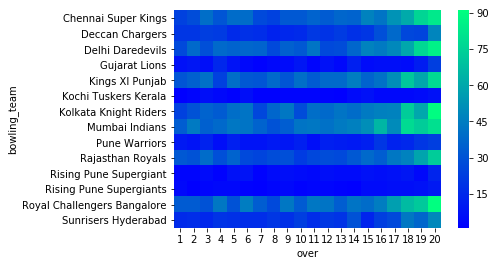

In [17]:
delivery6=delivery[['bowling_team','over','player_dismissed']]
x=delivery6.pivot_table(values='player_dismissed',index='bowling_team',columns='over',aggfunc='count')
sns.heatmap(x,cmap='winter')

In [18]:
#3. Best batsman in death overs(17-20)
new_delivery=delivery[delivery['over']>16][['match_id','ball','batsman','batsman_runs']]
x=new_delivery.groupby(['batsman'])['batsman_runs'].agg('sum').reset_index()
y=new_delivery.groupby(['batsman'])['ball'].agg('count').reset_index()
y=y[y['ball']>49]
y=y.merge(x,on='batsman').set_index('batsman')
y['strike_rate']=round(y['batsman_runs']*100.0/y['ball'],2)
y.sort_values('strike_rate',ascending=False,inplace=True)
y.head(1)

,ball,batsman_runs,strike_rate
batsman,,,
AB de Villiers,409,905,221.27


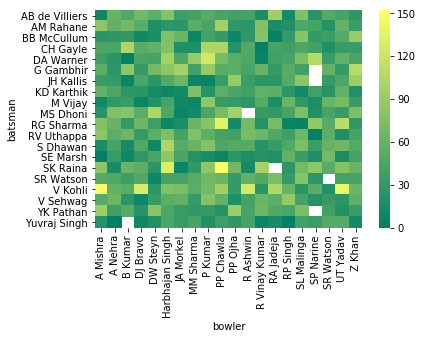

In [19]:
#fetching top 20 batsman(based on total runs)
bat=delivery.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values('batsman_runs',ascending=False).head(20)
#fetching top 20 bowler(based on total wickets)
mask=delivery['dismissal_kind']!='run out'
bowl=delivery[mask].groupby('bowler')['dismissal_kind'].agg('count').reset_index().sort_values('dismissal_kind',ascending=False).head(20)
#reducing rows to specific bowler, then to batsman and creating pivot table
x=delivery.set_index(['bowler']).loc[bowl['bowler']].reset_index().set_index('batsman').loc[bat['batsman']].pivot_table(values='batsman_runs',index='batsman',columns='bowler',aggfunc='sum')
sns.heatmap(x,cmap='summer')

In [37]:
#7. Top 10 bowler in death overs(17-20)
mask=delivery['over']>16
new_delivery=delivery[mask][['match_id','bowler','ball','total_runs']]
x=new_delivery.groupby(['bowler'])['total_runs'].agg('sum').reset_index()
y=new_delivery.groupby(['bowler'])['ball'].agg('count').reset_index()
y['overs']=round(y['ball']/6.0,2)
y=y.drop(columns='ball')
mask=y['overs']>=10
y=y[mask]
y=y.merge(x,on='bowler').set_index('bowler')
y['economy']=round(y['total_runs']/y['overs'],2)
y.sort_values('economy',inplace=True)
y.head(10)

,overs,total_runs,economy
bowler,,,
Sohail Tanvir,16.33,110,6.74
DE Bollinger,36.00,268,7.44
SP Narine,84.83,631,7.44
SL Malinga,148.50,1124,7.57
BA Stokes,10.83,84,7.76
WD Parnell,28.33,220,7.77
MA Starc,33.00,258,7.82
A Kumble,18.67,148,7.93
Mustafizur Rahman,24.83,197,7.93


In [38]:
#8. Top 10 feilders
mask=delivery['dismissal_kind']=='caught'
x=pd.DataFrame({'Fielder':delivery[mask]['fielder'].tolist(),'Number_of_catches':1}).groupby('Fielder')['Number_of_catches'].agg('count').reset_index().sort_values('Number_of_catches',ascending=False).set_index('Fielder').head(10)
x

,Number_of_catches
Fielder,
KD Karthik,88
SK Raina,83
AB de Villiers,81
MS Dhoni,76
RV Uthappa,75
RG Sharma,70
NV Ojha,65
KA Pollard,64
V Kohli,60


In [39]:
#9. team_performance
def f(a,b,c):
    if(a==b):
        return c;
    else:
        return b;
x=match[['team1','team2','winner']]
x['against']='None'
for index,row in x.iterrows():
    row['against']=f(row['winner'],row['team1'],row['team2'])
x

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,team1,team2,winner,against
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,Mumbai Indians
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,Gujarat Lions
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,Rising Pune Supergiant
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,Delhi Daredevils
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,Gujarat Lions
6,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,Kolkata Knight Riders
7,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,Royal Challengers Bangalore
8,Delhi Daredevils,Rising Pune Supergiant,Delhi Daredevils,Rising Pune Supergiant
9,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,Sunrisers Hyderabad


In [40]:
x['wcount']=1
x['lcount']=1
x=x.drop(columns=['team1','team2'])
most_win=x.groupby(['winner','against'])['wcount'].agg('count').reset_index().sort_values('wcount').drop_duplicates('winner',keep='last').set_index('winner')
most_loss=x.groupby(['against','winner'])['lcount'].agg('count').reset_index().sort_values('lcount').drop_duplicates('against',keep='last').set_index('against')
def team_performance(team):
    if team in most_win.index and team in most_loss.index:
        print('{0}:\nMost won against: {1}\nMost lost against: {2}'.format(team,most_win.loc[team,'against'],most_loss.loc[team,'winner']))
    else:
        print('INVALID TEAM')
team_performance('Chennai Super Kings')

Chennai Super Kings:
Most won against: Royal Challengers Bangalore
Most lost against: Mumbai Indians


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
#10. Team record(matches won and matches palyed)
x=match['team1'].tolist()+match['team2'].tolist()
x=pd.DataFrame({'Team':x,'Matches_Played':1})
x=x.groupby('Team')['Matches_Played'].agg('count').reset_index().sort_values('Team').set_index('Team')
y=match['winner'].tolist()
y=pd.DataFrame({'Team':y,'Matches_Won':1})
y=y.groupby('Team')['Matches_Won'].agg('count').reset_index().sort_values('Team').set_index('Team')
team_record=x.merge(y,on='Team')
team_record

,Matches_Played,Matches_Won
Team,,
Chennai Super Kings,131,79
Deccan Chargers,75,29
Delhi Daredevils,147,62
Gujarat Lions,30,13
Kings XI Punjab,148,70
Kochi Tuskers Kerala,14,6
Kolkata Knight Riders,148,77
Mumbai Indians,157,92
Pune Warriors,46,12
